# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [ ]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-04 14:46:14--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaf97cf649a446f1c6a76a56ced.dl.dropboxusercontent.com/cd/0/inline/CQacMaVFUE-Llg4AYOpwtbwJblDtBPadSM94PjX2logrYPDblV1ZnYuyzQxwwyd60x_JqG7Ruy3GM4kieotlWSvjBfFF7nW3mk4Yoi9AMEERH2DpdXMUDzepPn08MMCczisuCZpdSDJ1s1hP3ZWco-G3/file# [following]
--2024-04-04 14:46:14--  https://ucaf97cf649a446f1c6a76a56ced.dl.dropboxusercontent.com/cd/0/inline/CQacMaVFUE-Llg4AYOpwtbwJblDtBPadSM94PjX2logrYPDblV1ZnYuyzQxwwyd60x_JqG7Ruy3GM4kieotlWSvjBfFF7nW3mk4Yoi9AMEERH2DpdXMUDzepPn08MMCczisuCZpdSDJ1s1hP3ZWco-G3/file
Resolving ucaf97cf649a446f1c6a76a56ced.dl.dropboxusercontent.com (ucaf97cf649a446f1c6a76a56ced.dl.dropboxusercontent.com)... 162.125.2.15, 2620:

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [ ]:
file_path = '/HousingData.csv'
# TODO: Load the Dataset and Check for mising values and then impute them with the mean value
df = pd.read_csv(file_path)
miss = df.isnull().sum()
print(miss)

df.fillna(df.mean(), inplace=True)
print(df.head())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  


Get a brief description of the dataset

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.92

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [ ]:
# TODO: drop MEDV and convert to numpy array
df2 = df.drop(columns=['MEDV'])
df2_arr = df2.values
print(df2_arr)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

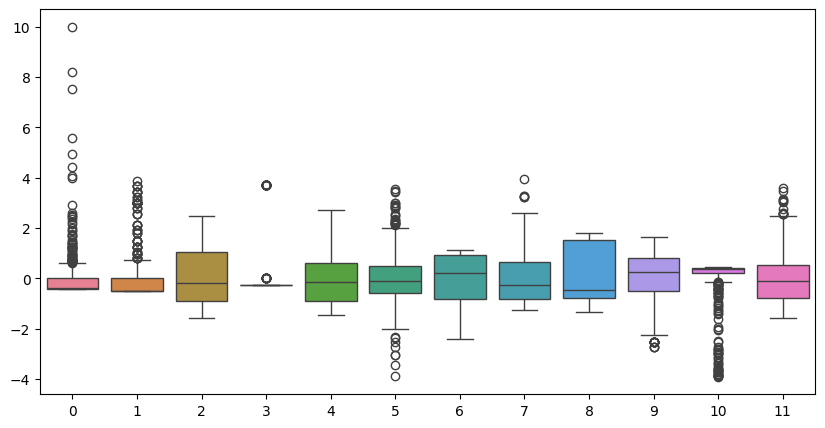

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sd = scaler.fit_transform(df2_arr)
plt.figure(figsize=(10, 5))
sns.boxplot(data=sd)
plt.show()



add polynomial features to increase model complexity!



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


pf = PolynomialFeatures(degree=2)
scale = pf.fit_transform(sd)


poly = pd.DataFrame(scale)
poly.head()



,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,1.0,-0.422328,0.296443,-1.311010,-0.279851,-0.144217,0.413672,-0.121059,0.140214,-0.666608,...,0.444367,0.972582,-0.294009,7.360327e-01,2.128682,-0.643495,1.610949e+00,0.194527,-4.869857e-01,1.219138e+00
1,1.0,-0.419870,-0.489639,-0.599771,-0.279851,-0.740262,0.194274,0.378716,0.557160,-0.987329,...,0.974820,0.299254,-0.435464,5.038863e-01,0.091866,-0.133680,1.546849e-01,0.194527,-2.250921e-01,2.604599e-01
2,1.0,-0.419872,-0.489639,-0.599771,-0.279851,-0.740262,1.282714,-0.270627,0.557160,-0.987329,...,0.974820,0.299254,-0.391404,1.224040e+00,0.091866,-0.120155,3.757603e-01,0.157154,-4.914695e-01,1.536974e+00
3,1.0,-0.419277,-0.489639,-1.330435,-0.279851,-0.835284,1.016303,-0.828770,1.077737,-1.106115,...,1.223491,-0.125027,-0.460324,1.543399e+00,0.012776,0.047040,-1.577174e-01,0.173192,-5.806857e-01,1.946954e+00
4,1.0,-0.414981,-0.489639,-1.330435,-0.279851,-0.835284,1.228577,-0.522338,1.077737,-1.106115,...,1.223491,-0.125027,-0.487854,2.804610e-16,0.012776,0.049853,-2.865985e-17,0.194527,-1.118309e-16,6.429012e-32


Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [ ]:
# TODO: extract the MEDV
y = df['MEDV'].values
print(type(y))

print(y[:5])

<class 'numpy.ndarray'>
[24.  21.6 34.7 33.4 36.2]




Split the dataset into two parts such that the training set contains 80% of the samples.

In [ ]:
from sklearn.model_selection import train_test_split

y = df['MEDV'].values
X = poly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training


Fit a linear regressor to the data. (Use sklearn)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Coefficients:", lr.coef_[1:])


Coefficients: [ 2.6154321   0.82393716  0.27136263 -3.48211983 -1.29409137  3.44585661
 -1.21943076 -1.81707978 -1.35705037 -0.76272409  0.09412848 -3.26790109
  0.18881553 -2.12293611  3.27201664  2.99592944 -2.33583776  0.34763137
  0.20874183  2.21883471 -2.3332244  -2.04447912  0.00741757  1.1932215
 -0.0841126   0.10138591  0.27470966 -2.78021092 -0.15279813  0.76158833
 -1.08630659  2.9712488  -0.26864023 -3.02213841 -1.60704564  1.31321171
 -0.31101422 -0.51019783  1.28252455  1.32809034  1.38205448 -0.65090506
 -1.06080996  0.7722254  -0.50635113  1.37177961 -1.08949576 -0.95013821
 -0.44543729 -1.69626905  0.54715814 -0.18858163  0.00691852 -0.47122609
 -0.37917028 -1.24093403  0.37674064  3.63408849  1.95669949 -2.07628197
 -0.48758374  0.5331536   0.73480488 -0.47672061  0.14479989 -2.03085847
 -1.1821997  -0.46294466  0.69666166  0.06214453  0.43530299 -0.67289245
  0.37224018 -1.12519132 -1.17650773  2.24180978 -2.15987726 -0.53315683
  0.44254117  0.74073985 -0.11801545  

Get the coefficients of the variables and visualize it

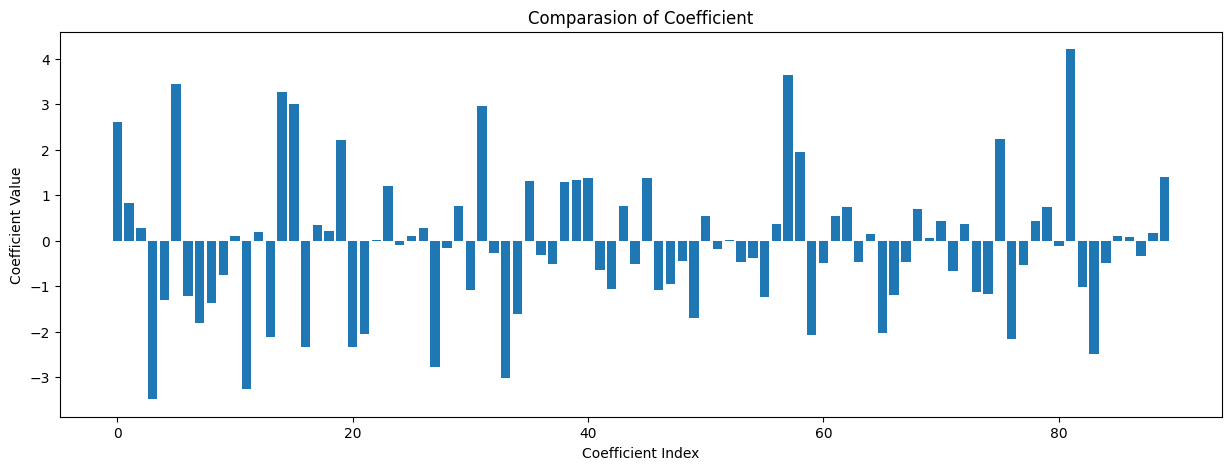

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(15, 5))
plt.bar(range(len(lr.coef_[1:])), lr.coef_[1:])

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Comparasion of Coefficient')
plt.show()



Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [ ]:
# TODO: Calculate R² score and MSE on the training dataset
train_r_squared = lr.score(X_train, y_train)
y_train_pred = lr.predict(X_train)
print("R-squared on train dataset:", train_r_squared)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on train dataset:", train_mse)

R-squared on train dataset: 0.9233615957926449
Mean Squared Error on train dataset: 6.65783903781899


Predict the value of "y" for each "x" belonging to the "testing" set

In [ ]:
print(lr.predict(X_test))

[26.60760472 39.62214268 18.71401934 21.00627478 15.36932115 18.14967249
 19.2680689  14.04520907 20.41411804 19.68358046 19.34721612 17.80080883
  9.52923494 17.56130221 17.61765281 23.1886407  19.83784911  9.82571722
 48.00938013 13.01200313 24.67113881 28.75366122 15.14797668 19.48768303
 16.8711114  16.54597743 17.07120558 13.34377675 16.66485127 19.34855953
 18.50229727 23.95889069 15.48239335 25.70102382 13.69224402 17.48588361
 33.1589375  20.10130817 20.24277819 21.68697931 16.91569466 31.33039866
 53.78155342 15.35787882 27.30502419 15.90970181 14.76748839 23.49841731
 17.57527936 29.19894908 19.95253249 33.61207695 17.02933983 26.86934524
 44.01327048 23.0722288  13.43102214 32.42020215 25.15187612 12.20309801
 25.03914004 29.01333968 31.99975955 14.25741358 27.2478974  13.81980117
 14.35877776 24.56841459 29.12596225 12.07120755 21.52505912 27.39851469
  9.60239834 22.99803726 19.8464662   7.55139317 22.13069349 49.95089019
 11.35178549 11.98183645 18.34848076 12.31262512 15

# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [ ]:
ll = Lasso(alpha=0.5)

ll.fit(X_train, y_train)




Lasso(alpha=0.5)

Get the coefficients of the variables and visualize it.

[-0.          0.         -0.          0.         -0.          2.71044561
 -0.         -0.         -0.17551806 -0.87919831  0.         -3.61571562
 -0.09172222  0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.         -0.
 -0.          0.          0.         -0.         -0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.          0.         -0.          0.21657471 -0.         -0.
  0.         -0.          0.09712834  0.          0.         -0.
 -0.20798319 -0.1485112  -0.          0.         -0.         -0.
  0.         -0.          0.7562266  -0.          0.         -0.85199921
 -0.59720675  0.         -0.          0.          0.         -0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.          0.26961623  0.          0.         -0.         -0.8353172
  0.         -0.         -0.         -0.24304235 -0.       

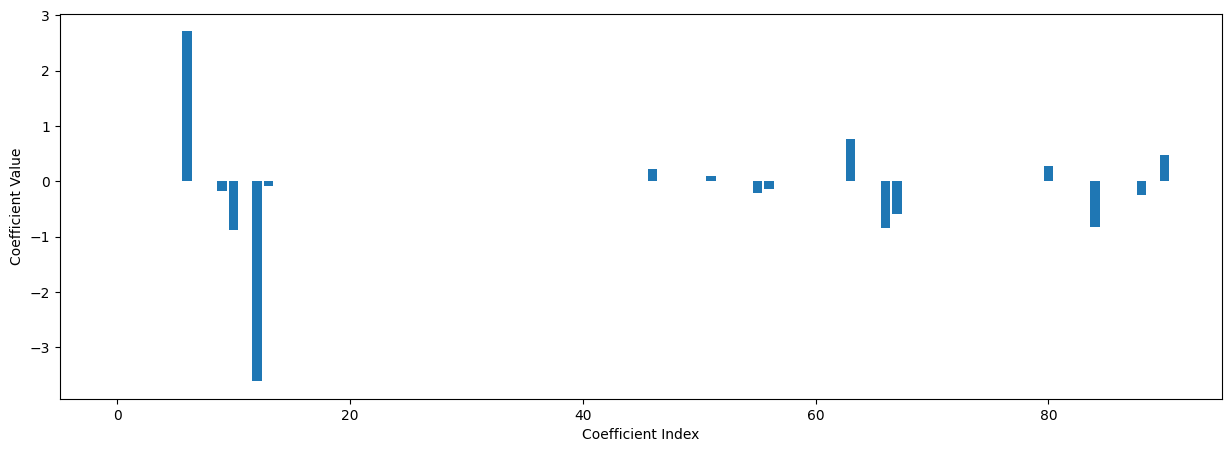

In [ ]:
print(ll.coef_[1:])
plt.figure(figsize=(15, 5))
plt.bar(range(len(ll.coef_)), ll.coef_)

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()

1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

    1
    اکثر وزن ها صفر (یا نزدیک به آن) شدند و فقط فیچرهای مهم ضریب تاثیرگذارند به این دلیل که فیچرهای کم اهمیت اکنون هزینه دارند.
    زیرا در روش کاهش گرادیان در لاسو مقدار آن مستقل از میزان وزن ثابت است ولی در ریج در وزنهای کم این گرادیان به خود مقدار وابسته است و باعث میشود خیلی دیرتر به صفر برسد.

    2
    ضرایب آلفای بیشتر منجر به منظمتر شدن مدل میشوند و وزن های بیشتری صفر شده و پراکندگی مدل بالاتر میرود که تا حدی خوب است ولی مقدار زیاد آن نیز باعث کاهش دقت مدل میشود (tradeoff)

Get the score value on train *dataset*


In [ ]:
# TODO: Calculate R² score and MSE on the training dataset
train_r_squared = ll.score(X_train, y_train)
y_train_pred = ll.predict(X_train)
print("R-squared on train dataset:", train_r_squared)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on train dataset:", train_mse)

R-squared on train dataset: 0.8171286694481938
Mean Squared Error on train dataset: 15.88665494849732


Predict the value of "y" for each "x" belonging to the "testing" set

In [ ]:
pred = ll.predict(X_test)

# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [ ]:
# TODO: Use Ridge from sklearn library
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X_train, y_train)

Ridge(alpha=10)

Get the coefficients of the variables and visualize it.

[ 0.05912156  0.51116396 -0.28467561 -0.32455353 -0.85827735  3.30888276
 -1.15903729 -1.59593251 -0.53180157 -0.91042787  0.42828162 -2.94077889
  0.16087076 -0.2517118   0.62754054  1.60530016 -1.09008989  0.19857273
 -0.21466179  0.91315274 -0.33329639 -0.37069977 -0.0685445   0.53227529
  0.13451302  0.04174477  0.21402759 -0.19753069 -0.13818418  0.11128147
 -0.41118718  0.69356948 -0.05349153 -0.33153368 -0.6523907   0.65774546
  0.00626011  0.17510478  0.56882038  0.84405893  0.75253857 -0.01735362
 -0.74138428  0.38541275 -0.84892644  0.44774634 -0.95605317 -0.87633987
 -0.11780543 -0.84245313  0.77371237 -0.05986682 -0.05282303 -0.5612907
 -0.35054369 -1.10824908 -0.28920456  0.95796985  0.161939   -0.72743981
 -0.23024552  0.59678367  0.61007814 -0.35547651  0.25507285 -1.39082276
 -1.30777268 -0.34506817  0.43935663  0.18768566  0.33640313  0.12071674
  0.17082987 -0.88889616 -0.93434533  1.1011708  -0.55229718 -0.01954442
 -0.25679014  0.78714857  0.62433033  1.95275298 -0.

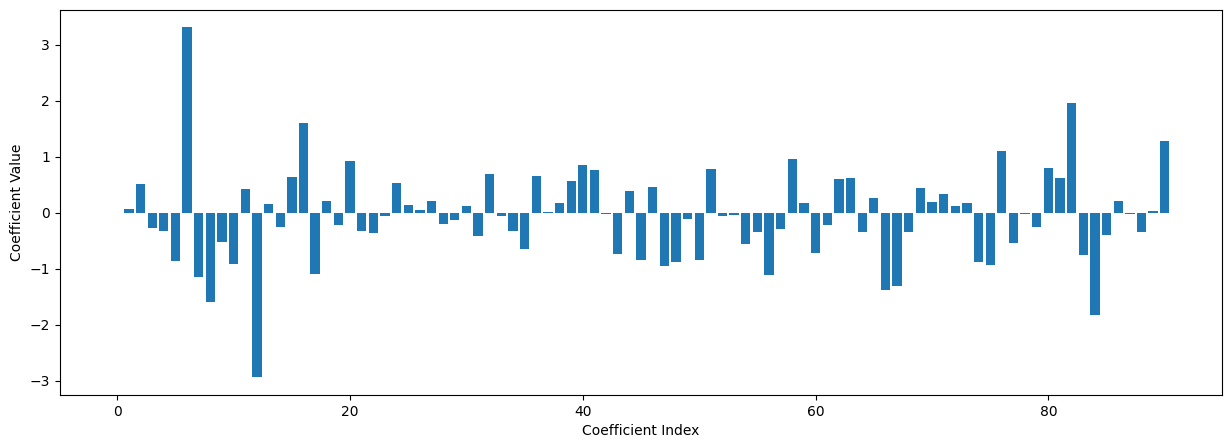

In [ ]:
print(rr.coef_[1:])
plt.figure(figsize=(15, 5))
plt.bar(range(len(ll.coef_)), rr.coef_)

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()

Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

    
     1
     تفاوت آنها در تعداد ضرایب صفر بالای لاسو در
       مقایسه با ریج است. در ریج با توجه به توان 2 ضرایب بزرگ معمولا ظاهر نمیشوند ولی مقادیر کوچکتر از 1 چون به توان 2 که میرسند کمتر میشوند (در مقایسه با لاسو)
       احتمال حضور بیشتری دارند و همانطور که شکل نشان میدهد تقریبا تمام ضرایب ناصفرند.
       با این توضیحات تفسیرپذیری لاسو بالاتر است.
       2
       هر چه آلفا بیشتر باشد میزان جریمه برای وزن ها بالاتر است. اگر آلفا صفر باشد همان رگرسیون عادی است و اگر آلفا خیلی زیاد باشد عملا نمیتواند به درستی پیش بینی کند زیرا تمام ضرایب را نزدیک صفر میبرد.


Get the score value on train *dataset*

In [ ]:
# TODO: Calculate R² score and MSE on the training dataset
train_r_squared = rr.score(X_train, y_train)
y_train_pred = rr.predict(X_train)
print("R-squared on train dataset:", train_r_squared)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on train dataset:", train_mse)

R-squared on train dataset: 0.9143940529441623
Mean Squared Error on train dataset: 7.4368800090845655


Predict the value of "y" for each "x" belonging to the "testing" set



In [ ]:
pred = rr.predict(X_test)

# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [ ]:
# HINT: Use DataFrame tools

print("Basic Regression:")
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("MSE train:", mse_train)
print("MSE test: ", mse_test)
print("R train: ",r2_train)
print("R test: ",r2_test)
print('--------------')
print("Lasso Regression:")
y_pred_train = ll.predict(X_train)
y_pred_test = ll.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("MSE train:", mse_train)
print("MSE test: ", mse_test)
print("R train: ",r2_train)
print("R test: ",r2_test)
print('--------------')
print("Ridge Regression:")
y_pred_train = rr.predict(X_train)
y_pred_test = rr.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("MSE train:", mse_train)
print("MSE test: ", mse_test)
print("R train: ",r2_train)
print("R test: ",r2_test)

Basic Regression:
MSE train: 6.65783903781899
MSE test:  18.122076674243075
R train:  0.9233615957926449
R test:  0.752882288445089
--------------
Lasso Regression:
MSE train: 15.88665494849732
MSE test:  16.227426678090257
R train:  0.8171286694481938
R test:  0.778718266278262
--------------
Ridge Regression:
MSE train: 7.4368800090845655
MSE test:  15.110036846916527
R train:  0.9143940529441623
R test:  0.7939553068756479


 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

مدل ریج روی داده های تست از لحاظ پیشبینی پذیری عملکرد بهتری داشته است که با توجه به در نظر گرفتن تمام فیچرها منطقی است.

علت تفاوت نتایج روی داده های آموزش این است که در رگرسیون عادی برای تابع لاس هیچ هزینه ای برای میزان ضرایب در نظر نمیگیریم و این باعث میشود ضرایب آنها برای آنکه به داده اندک آموزش فیت شوند بالا باشد. حال وقتی در ریج و لاسو برای آن نیز ترم منظمساز اضافه میکنیم باعث میشود کمتر به داده آموزش فیت شده و خطا برای آن بالاتر برود.


        